In [197]:
import cvxpy as cvx
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import dccp
import pandas as pd
from itertools import product

# Seed so results are reproducible
np.random.seed(0)

df = pd.read_csv('../edge_withDistancesAndRadii.csv')  # Edge list with distances and r1+r2 columns
rdf = pd.read_csv('../all brain volumes.csv')  # CSV with radius info for nodes

nodes = np.unique(df['n1'].tolist() + df['n2'].tolist())
n = len(nodes)

## define the matrix of distances between nodes. It is symmetric
rij = np.zeros((n,n))  # Distance matrix
Rij = np.zeros((n,n))  # R1+R2 combined radii (min distance) matrix
Iij = np.zeros((n,n))  # Intensity matrix

ids = [0 for x in range(n)]  # List to lookup ids later

# Create distance, r1+r2, intensity matrices
for i1 in range(n):
    for i2 in range(n):
        if i1 == i2: continue
        tempdf = df[(df['n1']==nodes[i1])&(df['n2']==nodes[i2])]
        if tempdf.index.size > 1:
            print("two edges for (%s,%s). only one will be stored. drop the duplicate and run again"%(nodes[i1],nodes[i2]))
            #raise(Exception("please drup the duplicate and run again"))
        elif tempdf.index.size == 1:
            rij[i1,i2] = tempdf['distance']
            Rij[i1,i2] = tempdf['R1+R2']
            Iij[i1,i2] = tempdf['intensity']
            ids[i1] = tempdf['n1'].iloc[0]
## symmetrize the tensors
rij = (rij + rij.transpose())/2.  # Distance matrix		
Rij = (Rij + Rij.transpose())/2.  # R1+R2 combined radii (min distance) matrix
Iij = (Iij + Iij.transpose())/2.  # Intensity matrix
Iij[Iij<1] = 1
Iij = Iij / 1000  # Scale intensities to kind of match distances

rad = []  # Create ordered list with radii to match the nodes in and intensities
for node in ids:
    rad.append(rdf.loc[rdf['ID'] == node]['Radius (mm)'].iloc[0])


In [205]:
real_coords = np.array([
    [-2.46, 0.6, 5.65],
    [-0.58, 3.4, 4.94],
    [-0.94, 0.25, 4.8],
    [-4.36, 0.3, 4.55],
    [-0.58, 0.2, 4.75],
    [-2.3, 0.25, 5.85],
    [-1.34, 1, 4.84],
    [-2.46, 1, 5.3],
    [-1.46, 0.1, 5.9],
    [0.5, 0.81, 4.85],
    [0.98, 0.25, 4.8],
    [-0.34, 0.2, 5.6],
    [-4.36, 0.5, 1],
    [-2.18, 1.25, 4.95],
    [-0.46, 1.15, 5.45],
    [-1.34, 1.75, 4.5],
    [-2.7, 0.13, 5.2],
    [0.02, 0.25, 4.9],
    [0.38, 0.7, 5],
    [-2.35, 0.13, 4.98],
    [-0.7, 1.13, 5.23],
    [-1.35, -0.75, 5.75],
    [-2.18, 1.75, 4.12],
    [-1.5, 0.35, 5.2],
    [-2.3, 0.25, 4.37],
    [-2.46, 0.55, 5.65],
])

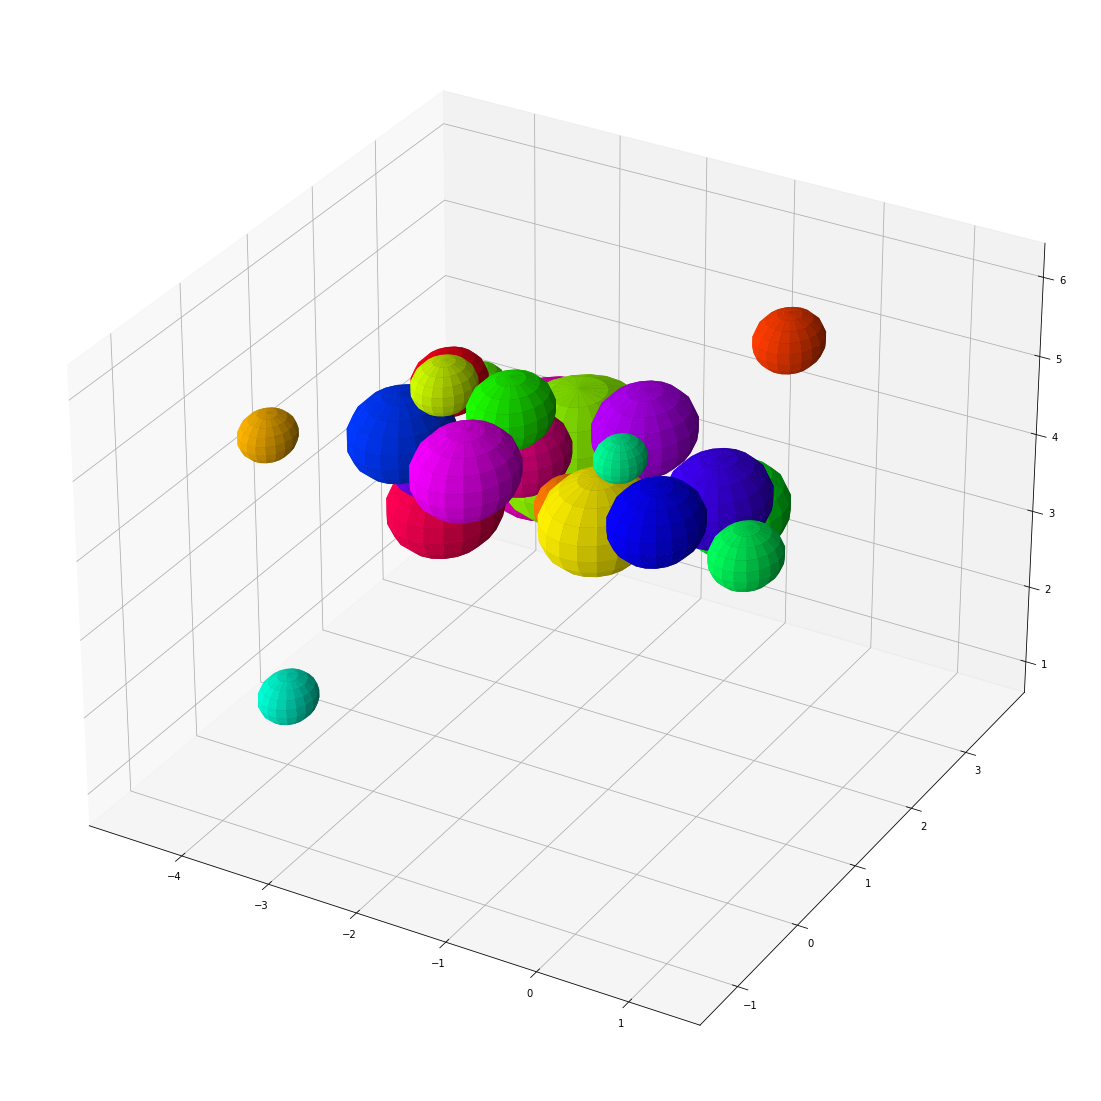

In [206]:
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')
ax.set_aspect('auto')
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
cmap = plt.cm.get_cmap('hsv', n)
for i in range(n):
    ax.plot_surface(
        real_coords[i, 0] + rad[i] * np.cos(u) * np.sin(v), real_coords[i, 1] + rad[i] * np.sin(u) * np.sin(v), real_coords[i, 2] + rad[i] * np.cos(v), color=cmap(i)
    )

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   , 0